# Example 9.0.1-9.1.6 Blasting

Author: Marcel Steiner-Curtis \
Date: 26.08.2018 sml, 11.09.2020 sml: R-Jupyter Notebook

Path to export figures for lecture notes

In [1]:
#setwd("../04 Datasets/02 Script/Chapter-09/pic-09")
export <- FALSE

## Example 9.0.1 Blasting 

read data

In [2]:
file <- "../04 Datasets/blasting.dat"
data <- read.table(file, header=TRUE)
str(data)

'data.frame':	48 obs. of  4 variables:
 $ Position : int  1 1 1 2 2 2 2 2 2 2 ...
 $ Charge   : num  2.18 3.33 3.33 3.33 3.12 3.12 3.12 2.6 2.08 2.08 ...
 $ Distance : int  188 183 177 53 49 46 44 42 42 44 ...
 $ Vibration: num  0.32 0.53 0.5 6.71 5.99 5.39 4.88 5.99 5.63 9.47 ...


define new $\log_{10}$-transformed variables

In [3]:
data$Charge.log    <- log10(data$Charge)
data$Distance.log  <- log10(data$Distance)
data$Vibration.log <- log10(data$Vibration)

Scatter diagram: ``Vibration`` versus ``Distance``, ``thermometers=Charge``

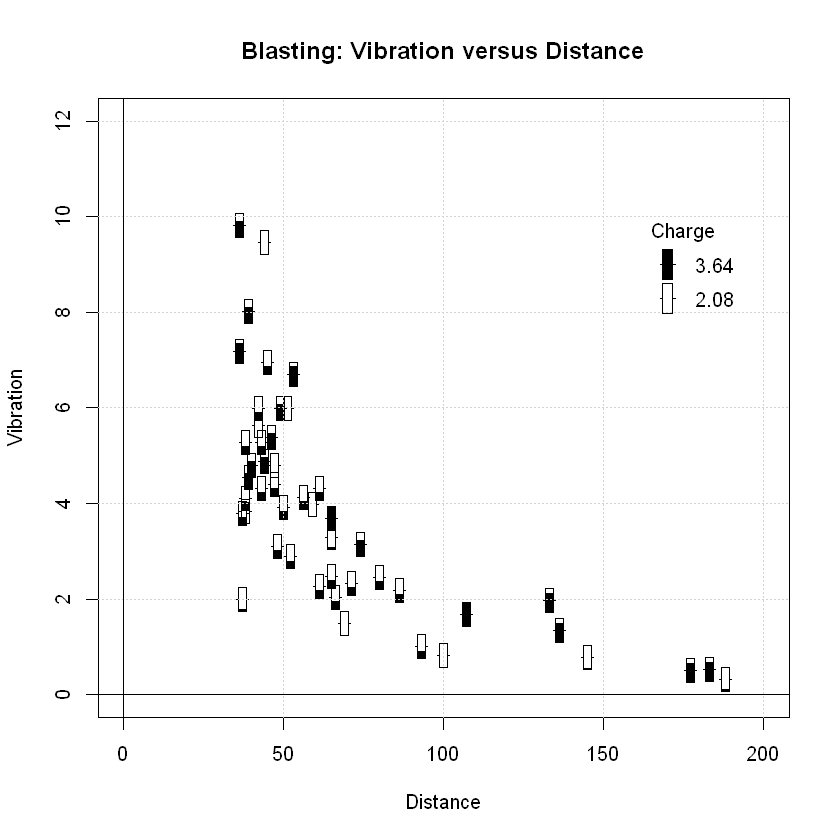

In [4]:
if(export){ postscript("BlastingVibrationsvsDistance.eps", 
                       width=7.5*sqrt(2), height=7.5) }
    Charge.prop <- (data$Charge-min(data$Charge))/
                    max(data$Charge-min(data$Charge))
    symbols(data$Vibration ~ data$Distance, 
            thermometers=cbind(1, 3, Charge.prop),
            inches=0.2,
            xlim=c(0,200),
            ylim=c(0,12),
            xlab="Distance",
            ylab="Vibration",
            main="Blasting: Vibration versus Distance")
    grid()
    abline(h=0, v=0)
    text(x=175,y=9.7, labels="Charge")
    symbols(x=c(170,170), y=c(8.3,9), thermometers=cbind(1,3,c(0,1)), 
            inches=0.25, add=T)
    text(x=c(185,185), y=c(8.3,9), labels=range(data$Charge))
if(export){ dev.off() }

## Example 9.1.1 Estimation

### estimation of the parameters <span style="color:red">(explicit formulae)</span>

In [5]:
n <- nrow(data);   n

[1] 48

vector of the observations

In [6]:
y <- as.vector(data$Vibration.log)
length(y)

[1] 48

matrix of the levels of the regressor variables

In [7]:
X <- as.matrix(cbind(Intercept=rep(1,n), 
                     data[,c("Distance.log", "Charge.log")]))
dim(X)

[1] 48  3

In [8]:
head(X)

Intercept,Distance.log,Charge.log
1,2.274158,0.3384565
1,2.262451,0.5224442
1,2.247973,0.5224442
1,1.724276,0.5224442
1,1.690196,0.4941546
1,1.662758,0.4941546


least-squares estimator

In [9]:
beta.hat <- solve(t(X)%*%X) %*% t(X) %*% y;   beta.hat

Intercept,2.8322552
Distance.log,-1.5107128
Charge.log,0.8083438


### estimation of the parameters <span style="color:blue">(lm)</span>

In [10]:
mod <- lm(Vibration.log ~ Distance.log + Charge.log, data)
summary(mod)


Call:
lm(formula = Vibration.log ~ Distance.log + Charge.log, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43571 -0.11580  0.00227  0.09715  0.36978 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.8323     0.2229  12.707   <2e-16 ***
Distance.log  -1.5107     0.1111 -13.592   <2e-16 ***
Charge.log     0.8083     0.3042   2.658   0.0109 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1529 on 45 degrees of freedom
Multiple R-squared:  0.8048,	Adjusted R-squared:  0.7962 
F-statistic: 92.79 on 2 and 45 DF,  p-value: < 2.2e-16


## Example 9.1.2 Tests on the Significance of any Individual Regression Coefficient

hat matrix

In [11]:
H <- X %*% solve(t(X)%*%X) %*% t(X)
dim(H)

[1] 48 48

mean of all leverages is $\frac{p}{n}$ (cf. Chap. 10.2)

In [12]:
mean(diag(H))-(1+2)/nrow(data)

[1] 5.828671e-16

fitted values

In [13]:
Vibration.log.hat <- H %*% y

residuals

In [14]:
res <- data$Vibration.log - Vibration.log.hat

error sum of squares

In [15]:
sigma2.hat <- sum(res^2)/(nrow(data)-3)

residual standard error

In [16]:
sqrt(sigma2.hat)

[1] 0.1529102

three standard errors

In [17]:
se.beta <- sqrt(sigma2.hat) * sqrt(diag(solve(t(X)%*%X)));   se.beta

Intercept Distance.log   Charge.log 
   0.2228918    0.1111472    0.3041724

null hypothesis

In [18]:
beta0 <- rep(0,3)

three test statistics

In [19]:
Test.beta <- (beta.hat-beta0)/se.beta;   Test.beta

Intercept,12.706862
Distance.log,-13.592000
Charge.log,2.657519


three $P$-values

In [20]:
2*(1-pt(abs(Test.beta), df=n-3))

Intercept,2.220446e-16
Distance.log,0.000000e+00
Charge.log,1.085725e-02


## Example 9.1.3 Confidence Intervals on the Regression Coefficient

significance level

In [21]:
alpha <- 0.05

three $95\%$ confidence intervals <span style="color:red">(explicit formulae)</span>

In [22]:
t.crit <- qt(p=1-alpha/2, df=nrow(data)-3);   t.crit
CI <- cbind(beta.hat - t.crit*se.beta, beta.hat + t.crit*se.beta)
colnames(CI) <- c("lower CI", "upper CI");   CI

[1] 2.014103

,lower CI,upper CI
Intercept,2.3833281,3.281182
Distance.log,-1.7345748,-1.286851
Charge.log,0.1957093,1.420978


three $95\%$ confidence intervals <span style="color:blue">(lm)</span>

In [23]:
confint(mod, level=1-alpha)

,2.5 %,97.5 %
(Intercept),2.3833281,3.281182
Distance.log,-1.7345748,-1.286851
Charge.log,0.1957093,1.420978


## Example 9.1.4 Confidence Interval of the Response

confidence interval of the response <span style="color:red">(explicit formulae)</span>

In [24]:
x0 <- c(1, log10(50), log10(3.0))
y0.hat  <- (t(x0) %*% beta.hat)[1,1]
se.conf <- sqrt(sigma2.hat * t(x0) %*% solve(t(X)%*%X) %*% x0)[1,1]
10^(y0.hat + c(0,-1,1)*qt(p=1-alpha/2, df=nrow(data)-3)*se.conf)

[1] 4.479994 3.910365 5.132602

define new point

In [25]:
data.new <- data.frame(Distance.log=log10(50), Charge.log=log10(3.0))

predict using ``interval="confidence"`` <span style="color:blue">(lm)</span>

In [26]:
Vibration.log.Conf <- predict(mod, newdata=data.new, 
                              interval="confidence", level=0.95)
10^Vibration.log.Conf

,fit,lwr,upr
1,4.479994,3.910365,5.132602


## Example 9.1.5 Prediction Interval

prediction interval of the response <span style="color:red">(explicit formulae)</span>

In [27]:
se.pred <- sqrt(sigma2.hat + se.conf^2)
10^(y0.hat + c(0,-1,1)*qt(p=1-alpha, df=nrow(data)-3)*se.pred)

[1] 4.479994 2.453559 8.180095

predict using ``interval="prediction"``(one-sided, therefore ``level=0.9)`` <span style="color:blue">(lm)</span>

In [28]:
Vibration.log.Pred <- predict(mod, newdata=data.new, 
                              interval="prediction", level=0.9)
10^Vibration.log.Pred

,fit,lwr,upr
1,4.479994,2.453559,8.180095


## Example 9.1.6 Coefficient of Determination, Multiple R-squared

multiple R-squared <span style="color:red">(explicit formulae)</span>

In [29]:
cor(data$Vibration.log, fitted(mod))^2

[1] 0.8048385

multiple R-squared <span style="color:blue">(lm)</span>

In [30]:
summary(mod)$r.squared

[1] 0.8048385